<a href="https://colab.research.google.com/gist/stevenhoang713/4e381269d1f203852dd9fd9876963a65/projectnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [33]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **Understanding the structure of the data**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Analytics Essentials Program/Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**

> The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [36]:
# checking shape of the data
df.shape

(1898, 9)

**Observations:**
> There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [37]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**

> There are 5 numerical columns and 4 object type columns in the dataset. The 'rating' column has the incorrect data type, and should be converted into a numerical column.





In [38]:
# We need to replace the "Not given" ratings in the 'rating' column to 0. This will enable us to successfully convert the column into a numerical column
df['rating'] = df['rating'].replace(['Not given'],0)
df = df.astype({"rating": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [39]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**

*   There are no missing values in the data.
*   Treatment for missing values won't be neccessary.  







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [40]:
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


**Observations:**

* `Cost:`  On average, the cost of an order is roughly 16.50 USD, while 75% of orders costs about 22.30 USD or less. Most of the data falls between 12.08 USD and 22.30 USD.
*  `Rating:` The average rating is around 2.66. The majority of ratings are 0 and 5, which indicates a skewed distribution of ratings.
* `Food preparation time:` The average time it takes for food to be prepared is roughly 27 minutes, while the minimum time is 20 minutes, and the maximum time is 35 minutes.
*  `Delivery time:` The average delivery time is about 24 minutes. Delivery time ranges from 15 - 33 minutes.









### **Question 5:** How many orders are not rated? [1 mark]

In [41]:
# Find the total number of orders that were not given a rating
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

**Observations:**

> Out of the total of 1,898 orders in the dataset, 736 orders, or approximately 38%, were not given a rating.





# **Exploratory Data Analysis (EDA)**

## **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

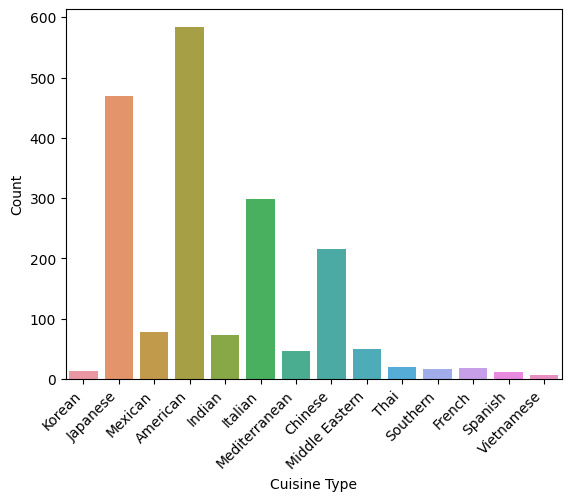

In [10]:
# Create a count plot to visualize order count for each cuisine type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()

**Observations on Cuisine Types:**
> The most popular cuisines based on order count are American, Japanese, Italian, Chinese, and Mexican.



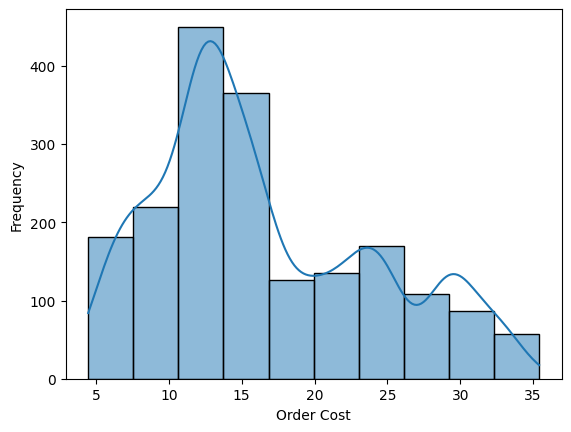

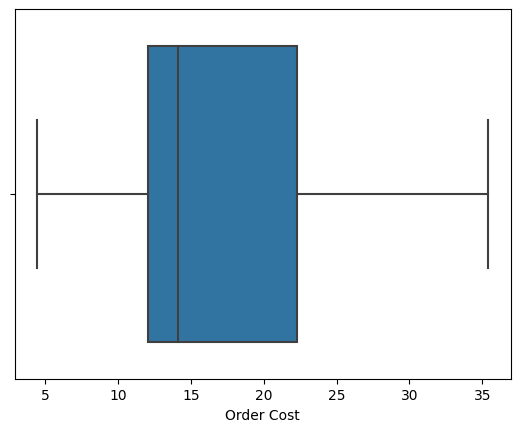

In [11]:
# Create a histogram to visualize the distribution of order costs
sns.histplot(data=df,x='cost_of_the_order', kde=True, bins=10)
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
plt.show()

# Create a box plot to visualize the distribution of order costs
sns.boxplot(data=df,x='cost_of_the_order')
plt.xlabel('Order Cost')
plt.show()

**Observations on Costs:**
> Both the histogram and box plot show that most of our order costs are on the lower end, but there are some really high-cost orders that stand out on the right side. This makes our average order cost higher than what you might expect if you just looked at the typical (median) order cost, which represents the middle point. The median order cost is approximately 14.00 USD, reflecting the influence of these high-cost outliers that are pushing up our average to be about 16.50 USD.

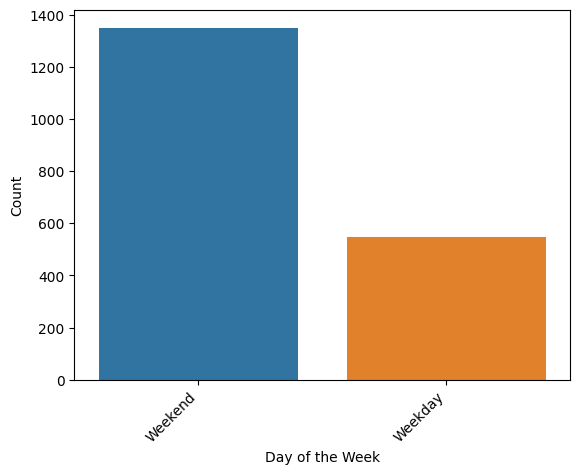

In [12]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

**Observations on Day of the Week:**
The countplot indicates that the number of orders on Saturday and Sunday is higher than on the weekdays. This pattern of higher weekend activity suggests that restaurant experiences a surge in orders over the weekends, which could be due to increased customer demand or specific promotions.

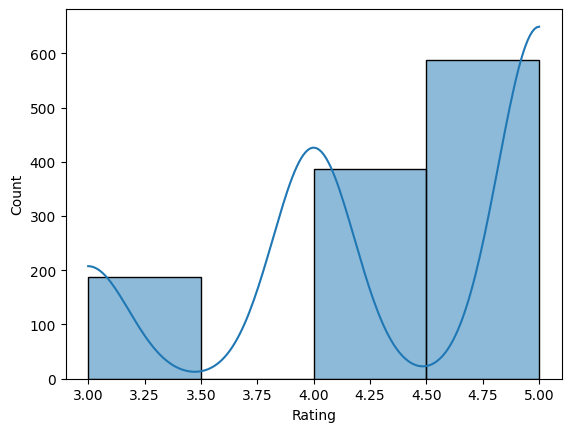

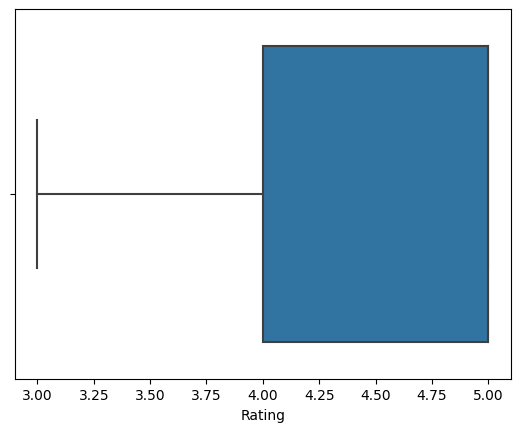

In [13]:
# First, we need to avoid bias by removing the "Not given" rows
filtered_ratings = df[df['rating'] != 0]

# Create a histogram to visualize observations on ratings
sns.histplot(data=filtered_ratings, x='rating', kde=True, bins=4)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Create a box plot to visualize the distribution of ratings
sns.boxplot(data=filtered_ratings,x='rating')
plt.xlabel('Rating')
plt.show()

**Observations on Ratings:**
> For rated orders, almost 39% of orders don't have ratings. Among the rated orders, the histogram shows a significant cluster of ratings around the maximum value, indicating a trend of high customer satisfaction and positive feedback. However, the boxplot presents a left skew, suggesting that there are also quite a few lower ratings. This skewness implies the presence of both high and low ratings. This mix of ratings highlights the importance of understanding the factors contributing to customer satisfaction and areas for potential improvement.

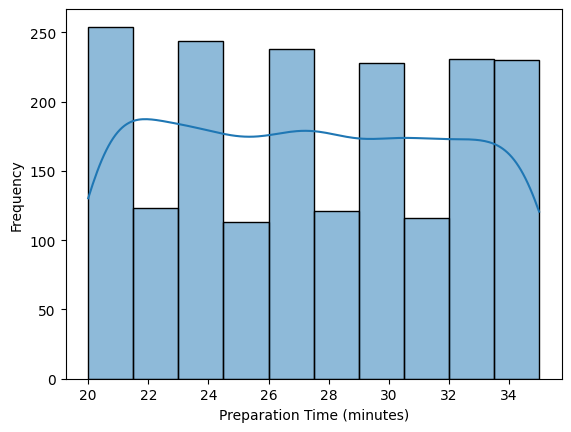

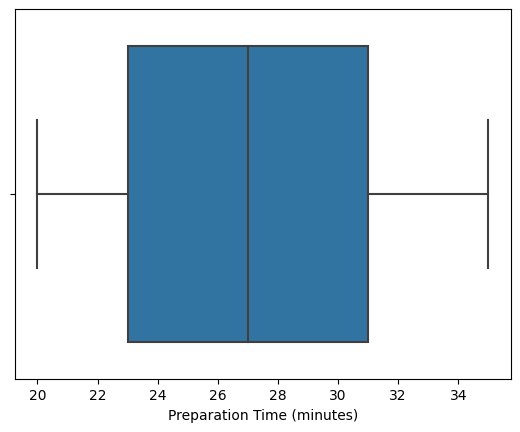

In [14]:
# Create a histogram and box plot to present the distribution of food preparation time
sns.histplot(df['food_preparation_time'], kde=True, bins=10)
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=df, x='food_preparation_time')
plt.xlabel('Preparation Time (minutes)')
plt.show()

**Observation on Food Preparation Time:**
> There is an even distribution among food preparation time shown for both the histogram and box plot between 20 - 36 minutes. This means that orders are consistently prepared within this time frame. Whether we examine the bars in the histogram or the box plot's summary, it's evident that the food preparation process is consistent and efficient, with most orders falling within this predictable time window.

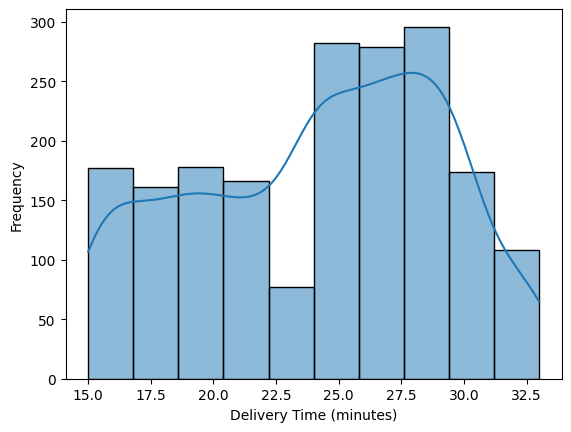

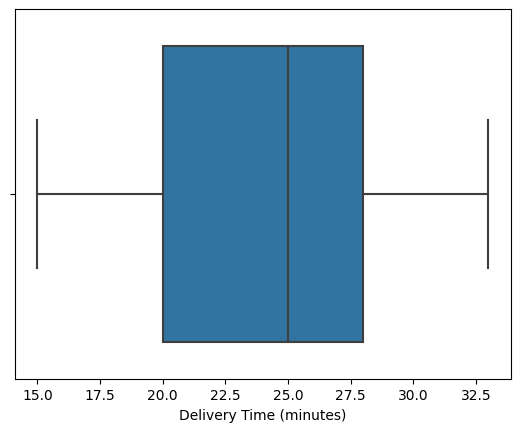

In [15]:
# Create a histogram and box plot to present the distribution of delivery time
sns.histplot(df['delivery_time'], kde=True, bins=10)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=df, x='delivery_time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

**Observation on Delivery Time:**
> The median delivery time is approximately 25 minutes, and the data distribution is skewed to the left. When we examine the histogram, we can see that the majority of orders are delivered within a narrow time frame, typically between 25 and 28 minutes. This consistency in delivery times suggests efficient and reliable service in ensuring that our customers receive their orders promptly.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# Group the data by 'restaurant_name' and count the number of orders for each restaurant
restaurant_orders = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_orders.head(5)
print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


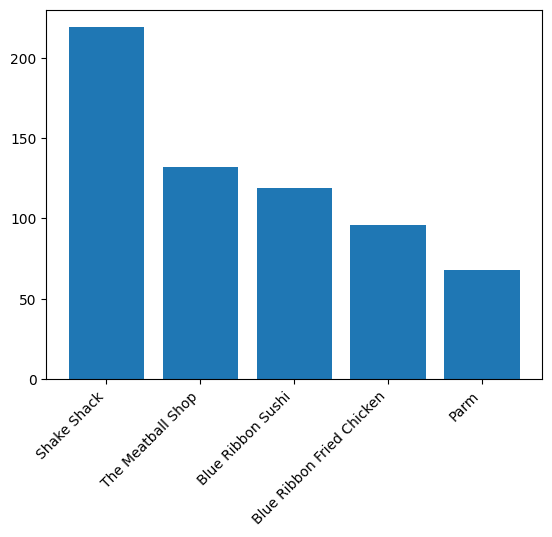

In [17]:
# Create a bar chart to visualize the top 5 restaurants
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**
> Shake Shack leads the pack with the highest number of orders, totaling 219 orders. The remaining top 5 restaurants, in descending order of order count, are The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Filter the data to include only orders placed on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Count the number of orders for each cuisine on weekends
weekend_cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Most populuar cuisine on weekends
most_popular_cuisine = weekend_cuisine_counts.idxmax()

print(most_popular_cuisine)

American


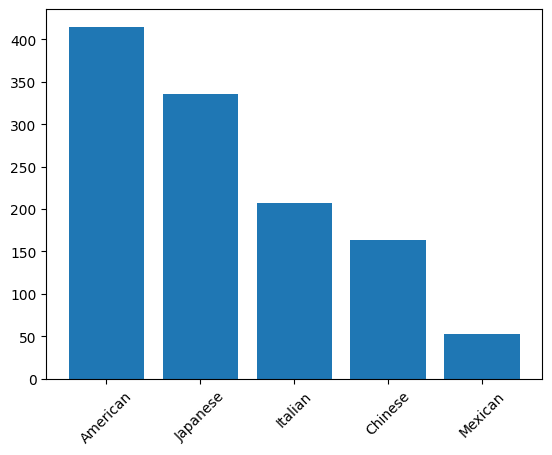

In [19]:
# Create a bar chart to display the top 5 weekend cuisines
top_5_weekend_cuisines = weekend_cuisine_counts.head(5)
plt.bar(top_5_weekend_cuisines.index, top_5_weekend_cuisines.values)
plt.xticks(rotation=45)
plt.show()

**Observations:**
> American cuisines is leading the pack for highest orders processed on the the weekends. The remaining top 5 cuisines types in descending order count, are Japanese, Italian, Chinese, and Mexican.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# Calculate the percentage of orders that cost more than $20
total_orders = len(df)
cost_above_20 = len(df[df['cost_of_the_order'] > 20])
percentage_above_20 = (cost_above_20 / total_orders) * 100
print(percentage_above_20)

29.24130663856691


**Observations:**
> 29.24% of the total orders in the dataset cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Calculate the average order delivery time
avg_delivery_time = df['delivery_time'].mean()
print(avg_delivery_time)

24.161749209694417


**Observations:**
> The average delivery time for all the orders is about 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Group the data by 'customer_id' and count the number of orders for each customer
customer_orders = df['customer_id'].value_counts()

# Sort the customers by order count in descending order and get the top 5
top_5_customers = customer_orders.head(10)

print(top_5_customers)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64


**Observations:**
> The data reveals the top 10 customers with the most total orders. It is also interesting to see the competitive results for the 5th spot tied by 4 customers with each having 7 orders. We might have to consider providing vouchers to all 4 of them to promote customer loyalty and higher sales.

## **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


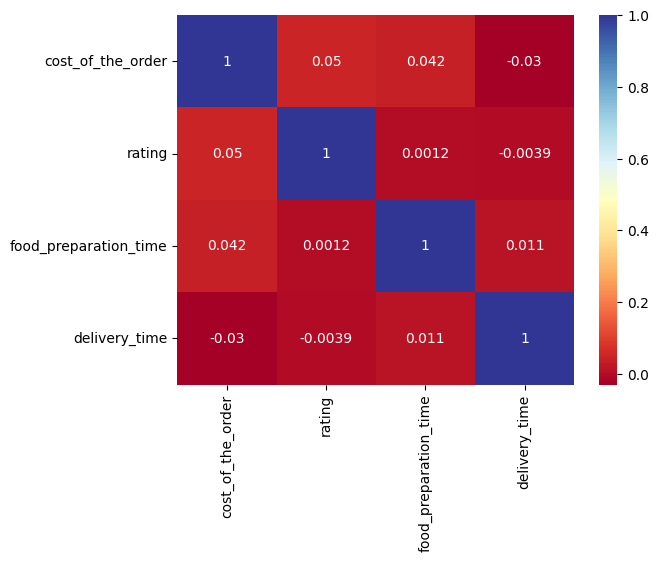

In [23]:
# Select numerical variables for correlation analysis
numerical_variables = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Calculate the correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.show()

**Observations:**
> The heatmap shows order cost, rating, food preparation time, and delivery time not having a strong correlation with each other.

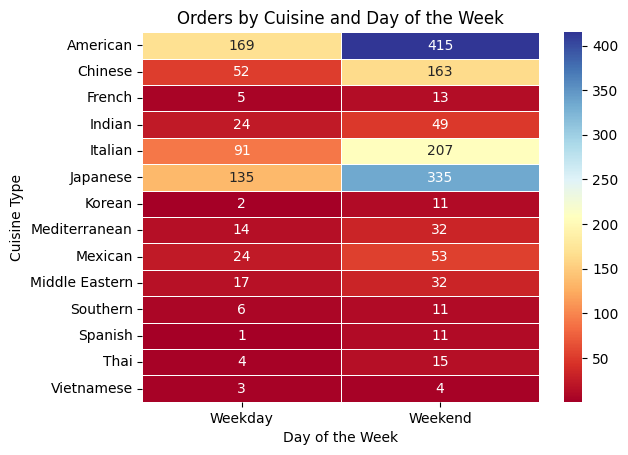

In [24]:
# Create a cross-tabulation of cuisine_type and day_of_the_week
cross_tab = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

# Create a heatmap to display total orders by day of the week for each cuisine category
sns.heatmap(cross_tab, annot=True, cmap='RdYlBu', fmt='d', linewidths=0.5)
plt.title('Orders by Cuisine and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.show()

**Observations**
> The heatmap results indicate that weekends are generally more popular for food orders across different cuisine categories, with American and Japanese cuisines being the top choices.

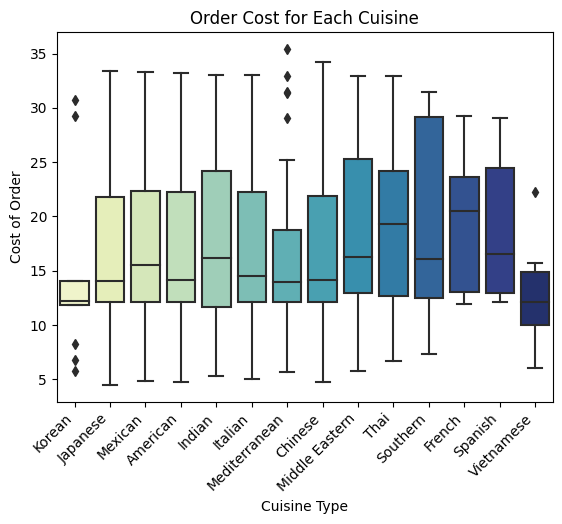

In [25]:
# Create a box plot to explore the variation in 'cost_of_the_order' by 'cuisine_type'
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.title('Order Cost for Each Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.show()

**Observations**
> The box plot shows order costs within most cuisine categories display varying levels of skewness, primarily leaning towards the right side of the distribution. This implies that the typical order costs tend to be lower for majority of cuisines.

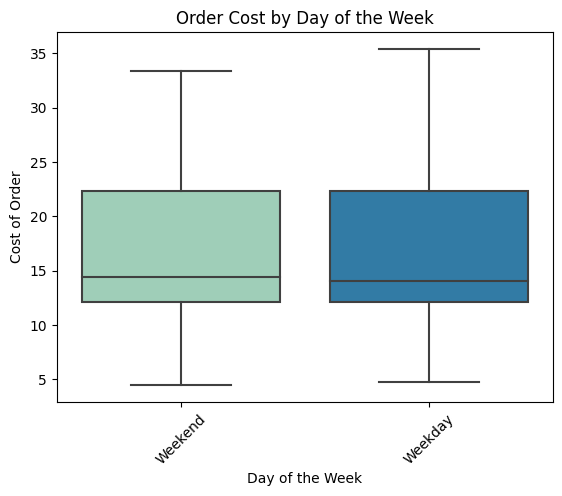

In [26]:
# Create a box plot to explore how 'cost_of_the_order' varies with 'day_of_the_week'
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', palette='YlGnBu')
plt.xticks(rotation=45)
plt.title('Order Cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of Order')

plt.show()

**Observations**
> The box plot demonstrates that the majority of orders have consistent and similar costs for both weekdays and weekends. This implies that customers spend relatively the same regardless of the day of the week.

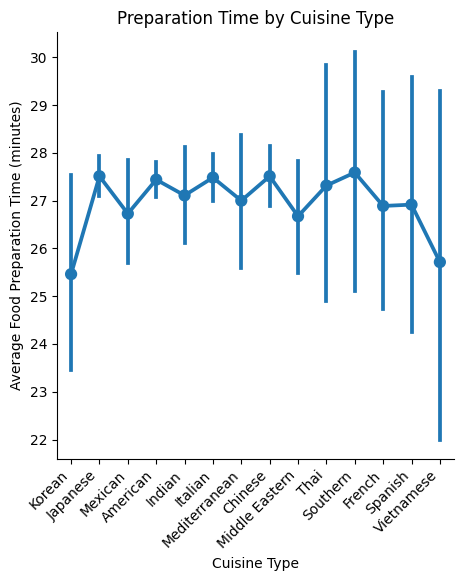

In [27]:
# Create a catplot to compare average preparation time by cuisine type
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', kind='point')
plt.title('Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.xticks(rotation=45, ha='right')

plt.show()

**Observations**
> Most cuisine categories maintain a similiar average preparation time. The presence of larger confidence intervals in some categories highlights the need for potential improvements.

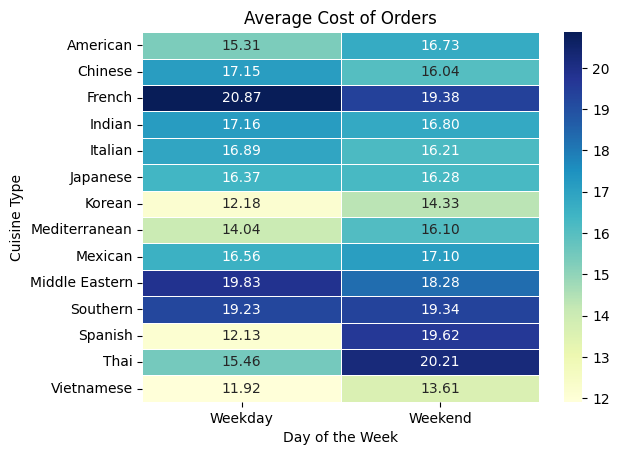

In [28]:
# Calculate the average cost for each combination of cuisine type and day of the week
pivot_table = df.pivot_table(index='cuisine_type', columns='day_of_the_week', values='cost_of_the_order', aggfunc='mean')

# Create a heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Average Cost of Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')

plt.show()

**Observations**
> The heatmap provides patterns of customer spending behavior, with some cuisines attracting higher costs on weekends, while others maintain consistent pricing throughout the week.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [29]:
# Filter the data to remove unrated rows and focus on restaurants with ratings
filtered_data = df[df['rating'] > 0]

# Group the data by restaurant names to calculate ratings
grouped_data = filtered_data.groupby('restaurant_name')['rating']

# Calculate the average and count of ratings for each restaurant
restaurant_stats = grouped_data.agg(['mean', 'count'])

# Identify restaurants that meet both criteria
qualified_restaurants = restaurant_stats[(restaurant_stats['mean'] > 4) & (restaurant_stats['count'] > 50)]

# Reset the data structure
qualified_restaurants.reset_index(inplace=True)

# Display the list of qualified restaurants
qualified_restaurants

,restaurant_name,mean,count
0,Blue Ribbon Fried Chicken,4.328125,64
1,Blue Ribbon Sushi,4.219178,73
2,Shake Shack,4.278195,133
3,The Meatball Shop,4.511905,84


**Observations:**
> Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and the Meatball Shop qualify meet the conditions and are eligible for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [30]:
# Define the charging percentages
charge_percentage_over_20 = 0.25
charge_percentage_over_5 = 0.15

# Calculate the revenue for each order
df['revenue'] = df['cost_of_the_order']

# Apply the 25% charge for orders over $20
df['revenue'] = df.apply(lambda row: row['revenue'] * (1 + charge_percentage_over_20) if row['cost_of_the_order'] > 20 else row['revenue'], axis=1)

# Apply the 15% charge for orders over $5 (since orders over $20 were already handled)
df['revenue'] = df.apply(lambda row: row['revenue'] * (1 + charge_percentage_over_5) if row['cost_of_the_order'] > 5 else row['revenue'], axis=1)

# Calculate the total net revenue
net_revenue = df['revenue'].sum()

print(f"Net revenue generated by the company: ${net_revenue:.2f}")

Net revenue generated by the company: $40247.67


**Observations:**
> The net revenue generated by the company across all orders is $40247.67.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Calculate the total time for each order (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes for delivery
orders_over_60_minutes = len(df[df['total_delivery_time'] > 60])

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes for delivery: {percentage_over_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes for delivery: 10.54%


**Observations:**
> 10.54% of orders take more than 60 minutes for total preparation and delivery time.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [32]:
# Calculate the mean delivery time for weekdays
mean_weekday_delivery_time = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(), 2)

# Calculate the mean delivery time for weekends
mean_weekend_delivery_time = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(), 2)

# Print the results
print(f"Mean delivery time on weekdays: {mean_weekday_delivery_time} minutes")
print(f"Mean delivery time on weekends: {mean_weekend_delivery_time} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


**Observations:**
> On average, weekend orders have a quicker delivery time of around 22.47 minutes, while weekday orders take around 28.34 minutes. This highlights the importance of factoring in delivery speed when managing logistics and customer expectations based on the day of the week.

# **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## **Conclusions:**


1.   American, Japanese, Italian, Chinese, and Mexican cuisines are the most popular based on order count.

2.   Most cuisine categories display right-skewed order costs, indicating that typical order costs tend to be lower for the majority of cuisines.

3.   Weekdays and weekends show consistent and similar order costs, suggesting that customers spend relatively the same regardless of the day of the week.

4.   Cuisine categories maintain similar average food preparation times, although some have larger confidence intervals, indicating room for improvement.

5.   There are distinct patterns of customer spending behavior, with some cuisines experiencing higher costs on weekends.

6.   Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and the Meatball Shop qualify for a promotional offer due to their high average ratings and rating counts.

7.   Approximately 10.54% of orders have total preparation and delivery times exceeding 60 minutes, highlighting the need for improvements in efficiency.

8.   Weekend orders have faster average delivery times (around 22.47 minutes) compared to weekday orders (approximately 28.34 minutes), emphasizing the importance of considering delivery speed in planning and promotions.









## Recommendations:

1.   **Diverse Menu Choices:** Partner with a variety of restaurants, especially those offering popular cuisines like American, Japanese, Italian, Chinese, and Mexican. This variety caters to different tastes and lifestyles, making the platform more appealing.

2.   **Smart Pricing:** We need to think about our pricing, particularly for cuisines where order costs are consistent. A well-thought-out pricing strategy can attract more customers and keep them coming back.

3.  **Faster Delivery:** The delivery process should be optimized to make sure food reaches customers on time. This is a key factor in keeping customers happy.

4.   **Weekend Promotions:** Leverage the trend of higher weekend orders by offering special promotions or incentives on weekends, especially for cuisines that attract higher costs on those days.

5.   **Customer Feedback:** Customer ratings and feedback are crucial. Encourage more customers to share their thoughts on our app.

6.   **Restaurant Partnerships:** Strengthen partnerships with high-performing restaurants such as Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and the Meatball Shop.

7.   **Efficiency Improvements:** We need to look into why some orders take longer than 60 minutes for preparation and delivery. Streamlining processes will make sure customers get their food in a timely manner.


---